In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import scipy.stats as st



# Step 1 : Importing and Understanding Data

In [2]:
#importing housing dataset and shuffling the data
df = pd.read_csv(r"Housing_Data.csv")

#Dropping the unnamed columns
df  =df.drop('Unnamed: 0',axis = 1)
#Shuffling the data
df = df.sample(frac = 1,random_state = 3)
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
399,85000.0,7231,3,1,2,yes,yes,yes,no,yes,0,yes
251,52000.0,3520,2,2,1,yes,no,yes,no,no,0,no
455,75000.0,3800,3,1,2,yes,yes,yes,no,no,1,yes
466,54000.0,2856,3,1,3,yes,no,no,no,no,0,yes
129,127000.0,4600,3,2,2,yes,yes,no,no,yes,2,no


In [3]:
#To check the shape of dataset(row,columns)
df.shape

(546, 12)

In [4]:
# Let's look at some statistical information about our dataframe.
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# What type of values are stored in the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 399 to 249
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [6]:
#Checking all the numerical variables
df.select_dtypes(exclude = object).columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl'], dtype='object')

In [7]:
obj_cols = list(df.select_dtypes(include = object).columns)
obj_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [8]:
for col in obj_cols:
    print(df[col].value_counts())

yes    469
no      77
Name: driveway, dtype: int64
no     449
yes     97
Name: recroom, dtype: int64
no     355
yes    191
Name: fullbase, dtype: int64
no     521
yes     25
Name: gashw, dtype: int64
no     373
yes    173
Name: airco, dtype: int64
no     418
yes    128
Name: prefarea, dtype: int64


In [9]:
#Use get dummies to further categorize the Categorical variable
df = pd.get_dummies(data = df,columns = obj_cols,drop_first=True)

In [10]:
df.info()
#all the object type got converted to unsigned integer format.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 399 to 249
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         546 non-null    float64
 1   lotsize       546 non-null    int64  
 2   bedrooms      546 non-null    int64  
 3   bathrms       546 non-null    int64  
 4   stories       546 non-null    int64  
 5   garagepl      546 non-null    int64  
 6   driveway_yes  546 non-null    uint8  
 7   recroom_yes   546 non-null    uint8  
 8   fullbase_yes  546 non-null    uint8  
 9   gashw_yes     546 non-null    uint8  
 10  airco_yes     546 non-null    uint8  
 11  prefarea_yes  546 non-null    uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 33.1 KB


# Exploratory Data Analysis


## Missing Values

In [11]:
#To find the % of missing values
df.isna().sum()*100/546

price           0.0
lotsize         0.0
bedrooms        0.0
bathrms         0.0
stories         0.0
garagepl        0.0
driveway_yes    0.0
recroom_yes     0.0
fullbase_yes    0.0
gashw_yes       0.0
airco_yes       0.0
prefarea_yes    0.0
dtype: float64

<AxesSubplot:>

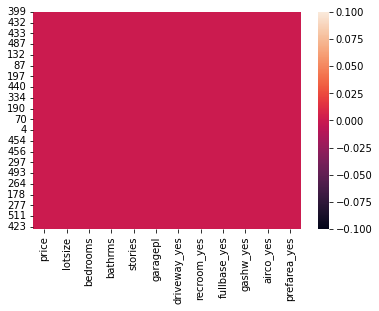

In [12]:
#We wanted to see which particular column has missing data
sns.heatmap(df.isnull())

Here we see there is no missing values.

## Taking Care of Outliers

## 1.Outlier for price

In [13]:
#Describe for price
df['price'].describe()

count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

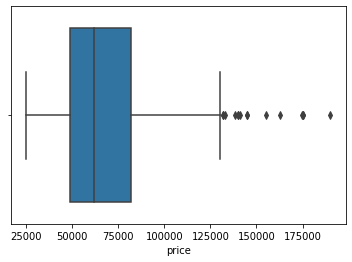

In [14]:
#Boxplot for price before removing outlier
sns.boxplot(df.price)

In [15]:
#Removing outlier for Price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
print(upper)

131312.5


In [16]:

c_df = df[df['price']<upper]

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

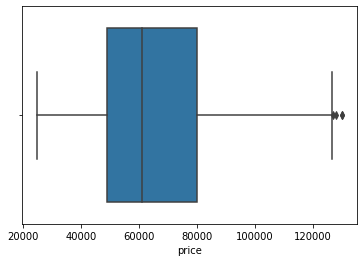

In [17]:
#Boxplot for price after removing outlier
sns.boxplot(c_df.price)

## 2.Outlier for lotsize

In [18]:
#Describe for lotsize
c_df['lotsize'].describe()

count      531.000000
mean      5061.403013
std       2073.492302
min       1650.000000
25%       3555.000000
50%       4500.000000
75%       6310.500000
max      15600.000000
Name: lotsize, dtype: float64

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lotsize'>

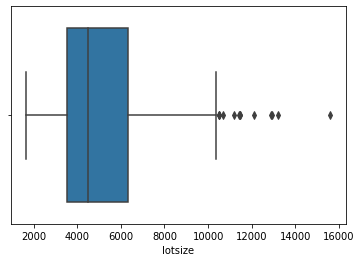

In [19]:
#Boxplot for lotsize before removing outlier
sns.boxplot(c_df.lotsize)

In [20]:
#Removing outlier for lotsize
Q1 = c_df['lotsize'].quantile(0.25)
Q3 = c_df['lotsize'].quantile(0.75)
IQR = Q3-Q1
IQR

upper = Q3+1.5*IQR
print(upper)


10443.75


In [21]:
c_df = c_df[c_df['lotsize']<upper]
c_df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
399,85000.0,7231,3,1,2,0,1,1,1,0,1,1
251,52000.0,3520,2,2,1,0,1,0,1,0,0,0
455,75000.0,3800,3,1,2,1,1,1,1,0,0,1
466,54000.0,2856,3,1,3,0,1,0,0,0,0,1
129,127000.0,4600,3,2,2,2,1,1,0,0,1,0


C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lotsize'>

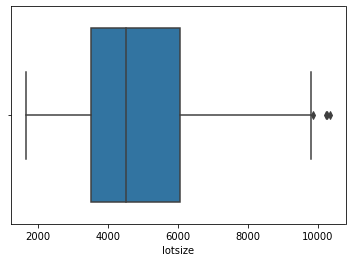

In [22]:
#Boxplot for price after removing outlier
sns.boxplot(c_df.lotsize)

In [23]:
#Final shape for clean data
c_df.shape

(518, 12)

# Visualization

In [24]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
399,85000.0,7231,3,1,2,0,1,1,1,0,1,1
251,52000.0,3520,2,2,1,0,1,0,1,0,0,0
455,75000.0,3800,3,1,2,1,1,1,1,0,0,1
466,54000.0,2856,3,1,3,0,1,0,0,0,0,1
129,127000.0,4600,3,2,2,2,1,1,0,0,1,0


### 1. Observing the Target Variable

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


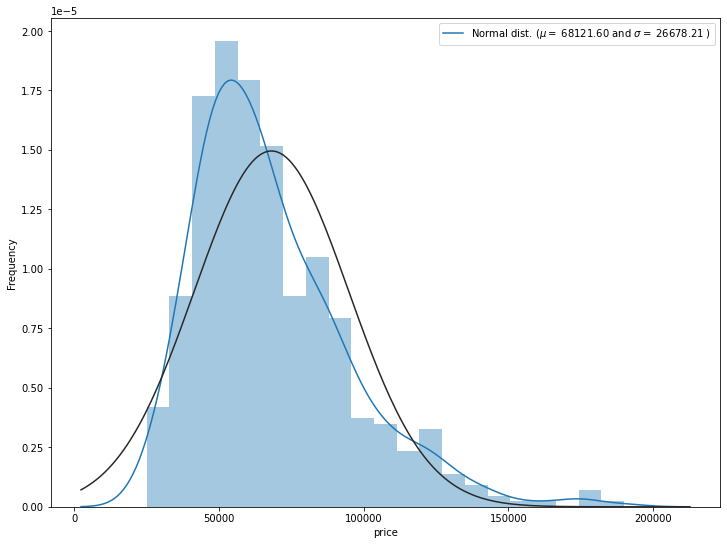

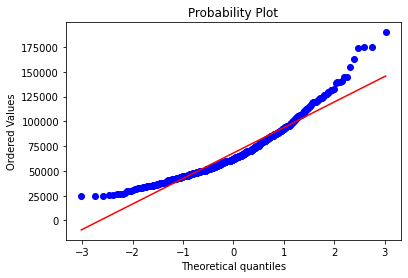

In [25]:
plt.subplots(figsize=(12,9))
sns.distplot(df['price'], fit=st.norm)

# Get the fitted parameters used by the function

(mu, sigma) = st.norm.fit(df['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
st.probplot(df['price'], plot=plt)
plt.show()


This target varibale is right skewed. Now, we need to tranform this variable and make it as normal distribution.

### 2.So we are using log for target variable to make the distribution more normal.

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


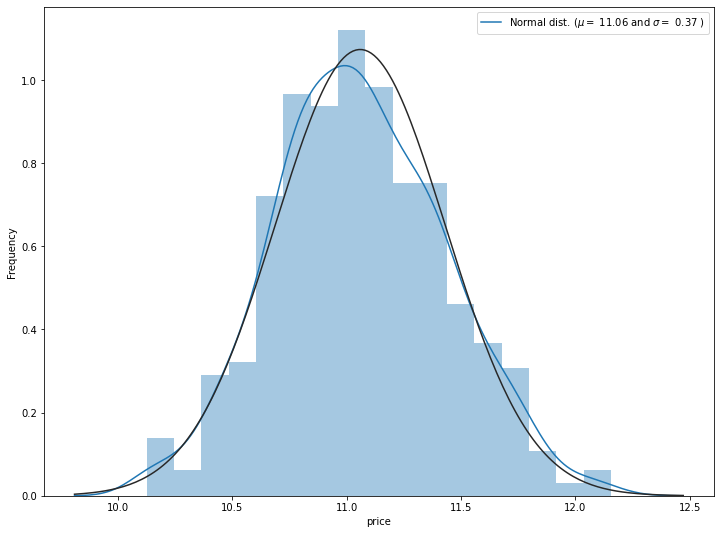

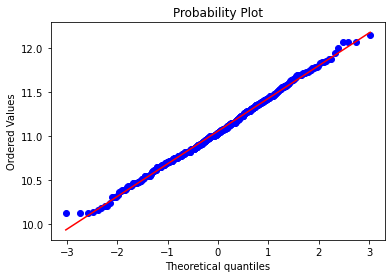

In [26]:
#we use log function which is in numpy
df['price'] = np.log1p(df['price'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(df['price'], fit=st.norm)

# Get the fitted parameters used by the function

(mu, sigma) = st.norm.fit(df['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
st.probplot(df['price'], plot=plt)
plt.show()

# Correlation in Data

In [27]:
corr = df.corr()['price']
corr[np.argsort(corr, axis=0)[::-1]]

price           1.000000
lotsize         0.542907
bathrms         0.484643
airco_yes       0.455914
stories         0.416115
garagepl        0.370242
bedrooms        0.369885
prefarea_yes    0.339615
driveway_yes    0.330359
recroom_yes     0.276285
fullbase_yes    0.217273
gashw_yes       0.088650
Name: price, dtype: float64

lotsize have more than 0.5 correlation with SalePrice.

This can prove to be important features to predict SalePrice.

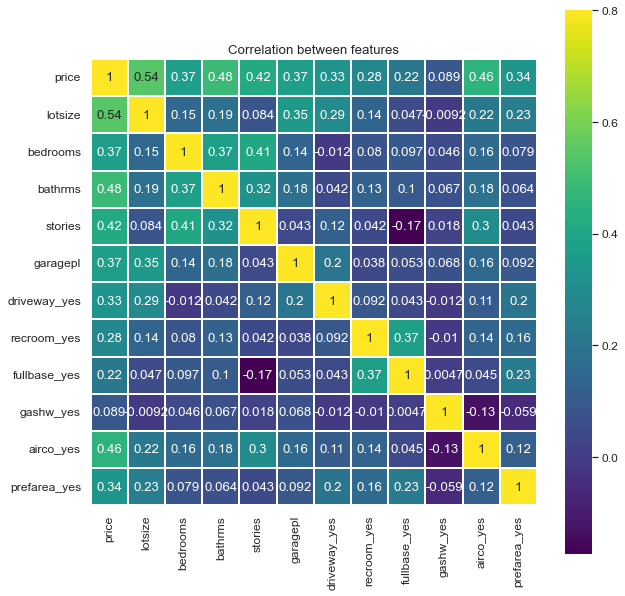

In [28]:
corrMatrix=df[['price','lotsize','bedrooms','bathrms','stories','garagepl','driveway_yes','recroom_yes','fullbase_yes','gashw_yes','airco_yes','prefarea_yes']].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

## Bivariate Analysis

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


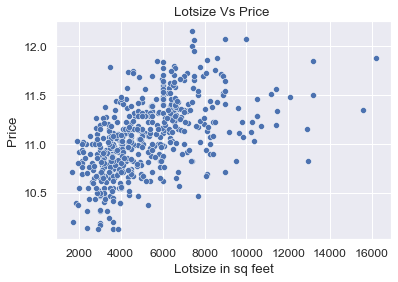

In [29]:
sns.scatterplot(df['lotsize'],df['price'])
plt.title("Lotsize Vs Price ")
plt.ylabel("Price")
plt.xlabel("Lotsize in sq feet");

# Building Statistical Model

In [30]:
import statsmodels.api as sm

In [31]:
#Transform the dataset
#Separate the input and target variables into X and Y.
y = c_df['price']
X = c_df.drop('price',axis = 1)
Xc = sm.add_constant(X)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])],index = Xc.columns, columns=['VIF'])

,VIF
const,28.700958
lotsize,1.378611
bedrooms,1.339791
bathrms,1.247437
stories,1.469558
garagepl,1.186343
driveway_yes,1.169549
recroom_yes,1.246374
fullbase_yes,1.315441
gashw_yes,1.028573


In [33]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     86.63
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          8.71e-109
Time:                        21:04:38   Log-Likelihood:                -5657.5
No. Observations:                 518   AIC:                         1.134e+04
Df Residuals:                     506   BIC:                         1.139e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1614.5007   3191.079      0.506      0.613   -4654.895    7883.897
lotsize          3.5692      0.394      9.062      0.000       2.795       4.343
bedrooms      1327.0797    944.087      1.406      0.160    -527.733    3181.892
bathrms       1.135e+04   1431.893      7.924      0.000    8532.581    1.42e+04
stories       6652.2293    834.623      7.970      0.000    5012.475    8291.983
garagepl      2974.3512    770.299      3.861      0.000    1460.973    4487.729
driveway_yes  6873.6578   1810.772      3.796      0.000    3316.100    1.04e+04
recroom_yes   5201.5850   1739.982      2.989      0.003    1783.107    8620.063
fullbase_yes  5254.8929   1436.575      3.658      0.000    2432.506    8077.280
gashw_yes     1.072e+04   2995.604      3.577      0.000    4830.011    1.66e+04
airco_yes      1.17e+04   1414.756      8.266      0.000    8915.530    1.45e+04
prefarea_yes  6799.4029   1540.709      4.413      0.000    3772.428    9826.378
==============================================================================
Omnibus:                       35.425   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.800
Skew:                           0.457   Prob(JB):                     3.80e-14
Kurtosis:                       4.423   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

BEDROOM IS THE ONLY INSIGNIFICANT FEATURE BECAUSE 0.160> 0.05 SO REMOVE IT

In [34]:
#Drop bedroom
Xc = Xc.drop('bedrooms',axis = 1)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     94.91
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          2.31e-109
Time:                        21:04:55   Log-Likelihood:                -5658.5
No. Observations:                 518   AIC:                         1.134e+04
Df Residuals:                     507   BIC:                         1.139e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4190.5303   2614.906      1.603      0.110    -946.854    9327.915
lotsize          3.6017      0.394      9.152      0.000       2.829       4.375
bathrms       1.176e+04   1402.393      8.387      0.000    9006.091    1.45e+04
stories       7075.0734    779.279      9.079      0.000    5544.060    8606.086
garagepl      3052.1492    769.047      3.969      0.000    1541.238    4563.061
driveway_yes  6560.6167   1798.754      3.647      0.000    3026.687    1.01e+04
recroom_yes   5134.9993   1741.010      2.949      0.003    1714.517    8555.482
fullbase_yes  5548.4947   1422.678      3.900      0.000    2753.426    8343.564
gashw_yes     1.081e+04   2997.718      3.606      0.000    4921.158    1.67e+04
airco_yes     1.167e+04   1416.041      8.244      0.000    8892.466    1.45e+04
prefarea_yes  6863.3562   1541.519      4.452      0.000    3834.805    9891.908
==============================================================================
Omnibus:                       38.369   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.790
Skew:                           0.482   Prob(JB):                     1.15e-15
Kurtosis:                       4.503   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test of Assumptions

# 1.Normality of Residuals

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

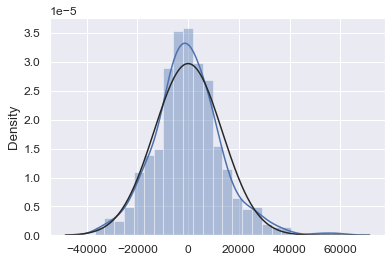

In [35]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

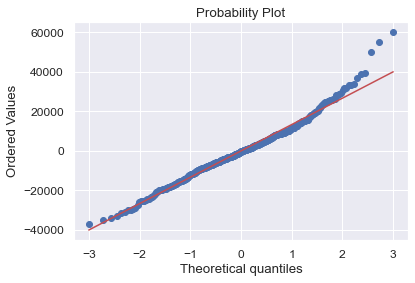

In [36]:
import scipy.stats as st

st.probplot(model.resid,plot = plt)
plt.show()

Ho: Data is normal

H1: Data is not normal

In [37]:
#Jarque-Bera (JB) test
st.jarque_bera(model.resid)

Jarque_beraResult(statistic=68.79006054804657, pvalue=1.1102230246251565e-15)

Here p-value<0.05 so reject Ho so DATA IS NOT NORMAL

In [38]:
#Transform the data using log
ly = np.log(y)

In [39]:
#Building model with log
model = sm.OLS(ly,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     89.37
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          3.97e-105
Time:                        21:05:01   Log-Likelihood:                 77.577
No. Observations:                 518   AIC:                            -133.2
Df Residuals:                     507   BIC:                            -86.40
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.1003      0.041    248.924      0.000      10.021      10.180
lotsize       5.604e-05   6.11e-06      9.176      0.000     4.4e-05     6.8e-05
bathrms          0.1625      0.022      7.470      0.000       0.120       0.205
stories          0.1032      0.012      8.534      0.000       0.079       0.127
garagepl         0.0432      0.012      3.624      0.000       0.020       0.067
driveway_yes     0.1199      0.028      4.297      0.000       0.065       0.175
recroom_yes      0.0701      0.027      2.594      0.010       0.017       0.123
fullbase_yes     0.1065      0.022      4.826      0.000       0.063       0.150
gashw_yes        0.1560      0.047      3.354      0.001       0.065       0.247
airco_yes        0.1702      0.022      7.745      0.000       0.127       0.213
prefarea_yes     0.1107      0.024      4.627      0.000       0.064       0.158
==============================================================================
Omnibus:                       11.427   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.112
Skew:                          -0.271   Prob(JB):                      0.00142
Kurtosis:                       3.560   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Jarque-Bera (JB) test
st.jarque_bera(model.resid)

Jarque_beraResult(statistic=13.111981898639677, pvalue=0.0014215734615402598)

Since pvalue = 0.0014< 0.05 so we failed to reject Ho and accept H1 so AGAIN DATA IS NOT NORMAL

# Test Homoscedasticity

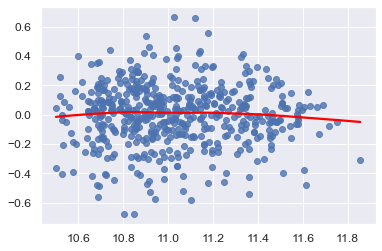

In [41]:
y_pred = model.predict(Xc)

sns.regplot(x = y_pred,y = model.resid,lowess = True,line_kws = {'color':'red'})
plt.show()

Ho: residual variance is  constant

H1: residual variance is not constant

In [42]:
#Goldfeld Test for Checking Homoscedasticity
import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(y = model.resid,x = Xc)
test 

(0.8592329375171289, 0.8835324625978885, 'increasing')

Prob = 0.88 suggests that residual variance is constant

# Test of Autocorrelation

C:\Users\vivek\AppData\Local\Temp\ipykernel_16508\3163042605.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


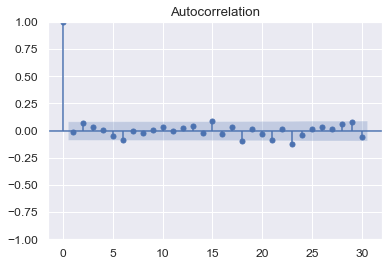

In [43]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid,lags = 30)
acf.show()

Durbin-Watson:	2.030
Indicates that there is no autocorrleation(close to 2).
Its showing barely there is any prescene of Autocorrelation.

# Test of Linearity

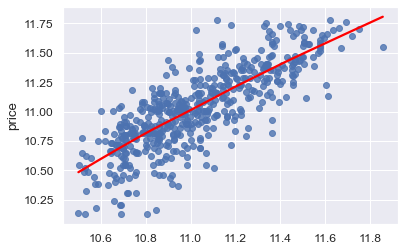

In [44]:
sns.regplot(x = y_pred, y = ly ,lowess = True,line_kws = {'color':'red'})
plt.show()

Ho: residuals exhibit linearity 

H1: residuals exhibit non-linearity



In [45]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res = model,frac = 0.5)

(1.1089462255926232, 0.2058720734284904)

P-value = 0.20>0.05 so accept Ho,We will accept null-hypothesis and conclude that residuals exhibhit linearity

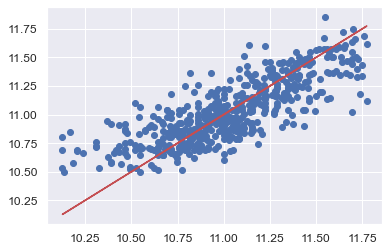

In [46]:
#Assumptions completed
plt.scatter(ly, y_pred)
plt.plot(ly,ly,'r')
plt.show()

ASSUMPTIONS COMPLETED

# Feature Selection

# 1.Recursive Feature Elimination

In [47]:
#Taking dependent and independent variable.
y = c_df['price']
X = c_df.drop('price',axis = 1)

In [48]:
#importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
#Fitting RFE
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=13)
rfe.fit(X,y)

#WE ASKED ALGORITHM TO TELL US WHICH FEATURE IS WORSE BY PUTTING 'n_features_to_select = 13

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [50]:
rfe.support_


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [51]:
pd.DataFrame(rfe.ranking_,index = X.columns,columns = ['Select'])

,Select
lotsize,1
bedrooms,1
bathrms,1
stories,1
garagepl,1
driveway_yes,1
recroom_yes,1
fullbase_yes,1
gashw_yes,1
airco_yes,1


This will give 12 best features with rank 1 and rest features with subsequent ranks

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [53]:
no_of_cols = X_train.shape[1]
r2score = []
rmse = []

lr = LinearRegression()   #estimator

for i in range(no_of_cols):
    rfe = RFE(lr,n_features_to_select=i+1)
    rfe.fit(X_train,y_train)
    y_test_pred = rfe.predict(X_test)
    
    #for r2score 
    r2 = r2_score(y_test,y_test_pred)
    r2score.append(r2)
    
    #now for mean square error
    rms = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse.append(rms)

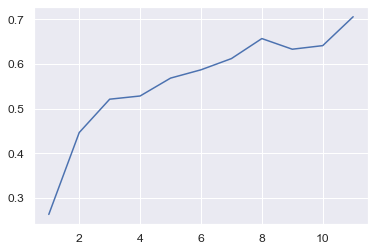

In [54]:
plt.plot(range(1,12),r2score)

In [55]:
r2score

[0.26330417675001516,
 0.44643837589801705,
 0.5210243928598304,
 0.5282075110960107,
 0.5681845189748466,
 0.586773795723794,
 0.6118578542541786,
 0.6566395124135399,
 0.6328259977969959,
 0.6408476793264104,
 0.7054620170122916]

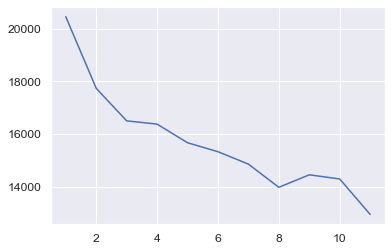

In [56]:
plt.plot(range(1,12),rmse)

In [57]:
rmse

[20463.490156778855,
 17738.569363294093,
 16500.31751556077,
 16376.123857544515,
 15666.959011531015,
 15326.02501704895,
 14853.575372294123,
 13970.461782922679,
 14446.796816354952,
 14288.115150439693,
 12939.1651881751]

# 2. Hyperparameter Tuning Approach to find the optimal number of features to keep

In [58]:
from sklearn.model_selection import KFold,GridSearchCV

params = {'n_features_to_select': list(range(1,13))}
lr = LinearRegression()
rfe = RFE(lr)

kf = KFold(n_splits=3,random_state=3)

gsearch = GridSearchCV(rfe,param_grid=params,cv = kf,return_train_score=True,scoring='r2')
gsearch.fit(X,y)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [59]:
gsearch.best_params_

NameError: name 'gsearch' is not defined

We found that if we keep n = 11,it will help us.

In [ ]:
pd.DataFrame(gsearch.cv_results_)

# 3.Forward selection to decide the best number of features to keep in the model

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

ModuleNotFoundError: No module named 'mlxtend'

In [61]:
lr = LinearRegression()
sfs1 = sfs(lr,k_features=11,cv = 3,scoring='r2',verbose = 2)

sfs1.fit(X,y)


NameError: name 'sfs' is not defined

In [ ]:
sf = pd.DataFrame(sfs1.subsets_).T
sf

In [ ]:
plt.plot(sf['avg_score'])
plt.show()

In [ ]:
cols = list(sfs1.k_feature_names_)
cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.3, random_state=3)

lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test,'r')

# Building Multiple Linear Regression Model

### Splitting the Data for Training and Testing

In [62]:
y = df['price']
X = df.drop('price',axis = 1)

In [63]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Performing Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [65]:
# print the intercept
print(lr.intercept_)

10.045638036405565


In [66]:
# Let's see the coefficient
cof_df = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])
cof_df

,Coefficient
lotsize,0.000049
bedrooms,0.027753
bathrms,0.180566
stories,0.093233
garagepl,0.049909
driveway_yes,0.119276
recroom_yes,0.097935
fullbase_yes,0.102553
gashw_yes,0.147698
airco_yes,0.177863


###  Predictions

In [67]:
# Making predictions using the model
y_pred = lr.predict(X_test)

###  Calculating Error Terms

In [68]:
from sklearn.metrics import r2_score,mean_squared_error

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print('r-square for train: ', r2_score(y_train,y_train_pred))
print('RMSE for train: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('\n')
print('r-square for test: ', r2_score(y_test,y_test_pred))
print('RMSE for test: ', np.sqrt(mean_squared_error(y_test,y_test_pred)))


r-square for train:  0.6866981480627448
RMSE for train:  0.20619802500874784


r-square for test:  0.6465269678466958
RMSE for test:  0.22485269341205347


This model has an accuracy of 64%